# Entscheidungsbäume mit R

<span style="color:red">Hier hat alles bis auf ein paar Tippfehler gepasst.</span>

Als [Beispieldatensatz](https://www.youtube.com/watch?v=diPvHSeizkg)
verwenden wir den Datensatz Kyphosis des rpart-Paketes. Der Datensatz [Kyphosis](https://de.wikipedia.org/wiki/Kyphose)  beschreibt Eingriffe bei Wirbelsäulenverkrümmung bei Kindern. Kyphosis bezeichnet eine nach dorsal konvexe Krümmung der Wirbelsäule. Unter der Verkrümmung leiden alle Kinder. Der Datensatz beschriebt auch das $Vorhandensein$ (2=present), $nicht Vorhandensein$ (1=absent) nach einer Operation. 

    Age  --> gibt das Alter in Monaten an

    Number --> gibt die Anzahl der betroffenen Wirbeln an

    Start --> der Wirbel, mit dem der Eingriff begonnen wurde


Als erstes lesen wir die Bibliothek 'rpart' ein und den in R vorhandenen Datensatz Kyphosis.

In [1]:
library(rpart)
data(kyphosis)
str(kyphosis) # Struktur anzeigen lassen

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


Der Datensatz besteht aus 81 Datensätzen mit jeweils 4 Variablen. Unsere Variablen 'Age', 'Number' und 'Start' sind vom Typ intenger. 'Kyphosis' wird, wie bereits beschrieben, in Vorhandensein (present) und nicht Vorhandensein (absent) unterteilt. 'Present' wird '2' zugeordnet und 'absent' wird die '1' zugeordnet.

Nun geben wir den Datensatz aus.

In [2]:
print(kyphosis)

   Kyphosis Age Number Start
1    absent  71      3     5
2    absent 158      3    14
3   present 128      4     5
4    absent   2      5     1
5    absent   1      4    15
6    absent   1      2    16
7    absent  61      2    17
8    absent  37      3    16
9    absent 113      2    16
10  present  59      6    12
11  present  82      5    14
12   absent 148      3    16
13   absent  18      5     2
14   absent   1      4    12
15   absent 168      3    18
16   absent   1      3    16
17   absent  78      6    15
18   absent 175      5    13
19   absent  80      5    16
20   absent  27      4     9
21   absent  22      2    16
22  present 105      6     5
23  present  96      3    12
24   absent 131      2     3
25  present  15      7     2
26   absent   9      5    13
27   absent   8      3     6
28   absent 100      3    14
29   absent   4      3    16
30   absent 151      2    16
31   absent  31      3    16
32   absent 125      2    11
33   absent 130      5    13
34   absent 11

Wir lassen uns die ersten 15 Datensätze anzeigen.

In [3]:
head(kyphosis, n=15)

Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16
absent,61,2,17
absent,37,3,16
absent,113,2,16
present,59,6,12


Obwohl der Datensatz mit 81 Datensätzen nicht sehr groß ist, wird er trotzdem in einem Trainings- und Testdatensatz eingeteilt. 

In [4]:
n_Daten <- nrow(kyphosis) # 81 Zeilen
# 70% der Daten werden zufällig ausgewählt und für die Trainingsdaten verwendet
# als Index wird verwendet:
set.seed(42)
Training_i <- sample(nrow(kyphosis), 0.7 * n_Daten)
length(Training_i) #Dies gibt die Anzahl der ausgewählten Zeilen aus

[1] 56

Da die Aufteilung in Trainings- und Testdaten zufällig vornehmen wird, würde sich bei jedem Durchlauf die Ausgabe ändern. Da wir dies vermeiden möchten, müssen wir einen [Random Seed](http://www.dummies.com/programming/r/how-to-take-samples-from-data-in-r/) setzen. Dieser wird oberhalb von 'Training_i' festgelegt. Wir verwenden  die Zahl 42. Man könnte auch jede andere ganze Zahl verwenden, um einen Entscheidungsbaum zu trainieren.

In [5]:
# Die restlichen 30% der Daten werden als Testdatensatz festgelegt.
Test_i <- setdiff(1:nrow(kyphosis), Training_i)
length(Test_i)

[1] 25

Um zu schauen, ob jeder Datensatz-Index sauber in einem Trainings- und Test-Index getrennt wurde, kann man die Funktion sort() verwenden.

In [6]:
sort(Training_i); sort(Test_i)

[1]  1  2  5  8  9 10 11 12 16 18 20 22 23 24 26 29 30 31 32 33 34 35 36 37 38
[26] 39 40 41 43 44 46 47 48 49 50 51 54 55 56 58 59 62 63 64 65 67 68 71 72 73
[51] 74 75 77 78 80 81

[1]  3  4  6  7 13 14 15 17 19 21 25 27 28 42 45 52 53 57 60 61 66 69 70 76 79

In dem oben ausgegeben Output, sieht man die Ausgabe der jeweiligen Datensätze, welche zu dem Trainings- und welche zu dem Test-Index zugeordnet wurden. Zuerst sieht man die Ausgabe des Trainingsdatensatz, darunter die des  Testdatensatzes.

Wenn die Datensatz-Zeilen (der Index) für den Trainings- und Testdatensatz festgelegt wurden, können die Datensätze definiert werden. Es findet die Bildung in den Trainings- und in den Testdatensatz statt.


In [7]:
Training <- kyphosis[Training_i,]
str(Training)

'data.frame':	56 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 2 1 2 1 1 ...
 $ Age     : int  11 36 96 118 177 91 72 59 131 68 ...
 $ Number  : int  3 4 3 4 2 5 5 6 5 5 ...
 $ Start   : int  15 13 12 16 14 12 15 12 13 10 ...


In [8]:
Test <- kyphosis[Test_i,]
str(Test)

'data.frame':	25 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 2 1 1 1 1 1 1 1 1 1 ...
 $ Age     : int  128 2 1 61 18 1 168 78 80 22 ...
 $ Number  : int  4 5 2 2 5 4 3 6 5 2 ...
 $ Start   : int  5 1 16 17 2 12 18 15 16 16 ...


Dem Trainingsdatensatz werden 56 Datensätze mit den 4 Variablen zugeordnet. 25 Datensätze werden dem Testdatensatz zugeordnet. Man sieht, welche Werte 'Age', 'Number', 'Start' des Trainingsdatenstzes und des Testdatenstzes zugeordnet worden sind. 

Mit dem Trainingsdatensatz Training wird über die folgende Funktion rpart ein Entscheidungsbaum trainiert. Mit diesem Funktionsaufruf werden keine zusätzlichen Argumnete zu der Steuerung des Trainings mitgegeben. 
Die Diagnose Kyphosis ist eine ja/nein- Beobachtung und die oben aufgezeigte Datensatzstruktur zeigt, dass es sich bei der Varibalen Kyphosis vom Typ Faktor handelt. Der rpart-Funtionsaufruf kann mit dem Argument method = 'class' so gesteuert werden, sodass ein Klassifikationsbaum geschätzt wird (Regressionsbaum -> es liegen keine kontinuierlichen Daten vor). In dem nachfolgenden Funktionsaufruf zeigt der rpart-Algorythmus, um welchen Typ es sich bei der Kriteriumsvariable (Kyphosis) handelt und schätzt einen Klassifikationsbaum.

In [9]:
# einfaches Training, ohne weitere Funktionsargumnete wird dargestellt
Anp <- rpart(Kyphosis ~ Age + Number + Start, data = Training)
print(Anp)

n= 56 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 56 13 absent (0.76785714 0.23214286)  
  2) Start>=12.5 31  2 absent (0.93548387 0.06451613) *
  3) Start< 12.5 25 11 absent (0.56000000 0.44000000)  
    6) Age>=123 7  1 absent (0.85714286 0.14285714) *
    7) Age< 123 18  8 present (0.44444444 0.55555556) *


Die oben dargestellte Ausgabe der Entscheidungsbaum-Anpassung zeigt, dass die Parameter Start und Age einen besonderen Beitrag zu der operativen Korrektur der Wirbelsäulenverkrümmung haben. Im mittleren Abschnitt der Ausgabe wird die Legende ausgegeben.

$Node:$ ist die Knotennummer. Es wird immer oben und dann von links nach rechts gelesen.

$Split:$ Wie die Klassifikation vorggenommen wird. Hier zum Beispiel Start <= 12.5 und Age < 51.5.

$n:$ Mit wie vielen Beobachtungen in den nächsten Knoten umgegangen wird z. B in den 2 Knoten mit 12 Knoten.

$loss$: bedeutet Verlust/Abgang. In den 2 Knoten wird mit 32 Beobachtungen hineingegangen. Der Grund dafür ist, dass die Bedingung Start>=12.5 zutrifft. Es liegt leider keine 100%ige Erfolgsquote vor, sondern nur 0.96875. Das hat zur Bedeutung, dass ein erfolgreicher Eingriff ab dem 12,5 Wirbel unter diesen Bedingungen bei 31 Eingriffen erwartet und 1 Eingriff wird nicht erfolgreich sein wird. Der Abgang aus diesen Konten ist 1. Damit ist das Ende dieses Astes erreicht.

$yval:$ Dies ist der zutreffende y-Wert (Kriteriumsvariable). In dem Beispiel absent oder present.

$yprob:$ Dies ist die Verteilung der y-Werte. Der  absent-Anteil beträgt für den 2. Knoten beträgt  96,875%.

$*:$ Dies bedeutet Astende. Die Bildung weiterer Knoten ist nicht mehr möglich. 

Die Baumstruktur, d. h., das Schätzen der optimalen Anpassung ist möglich durch Wahl der geeigneten Funktionsargumente. Auf dieses wird in diesem Beispiel aber nicht näher eingegangen.

Die Anpassung kann zur Unterstützung der Anpassungs-Interpretation folgendermaßen grafisch dargestellt werden:

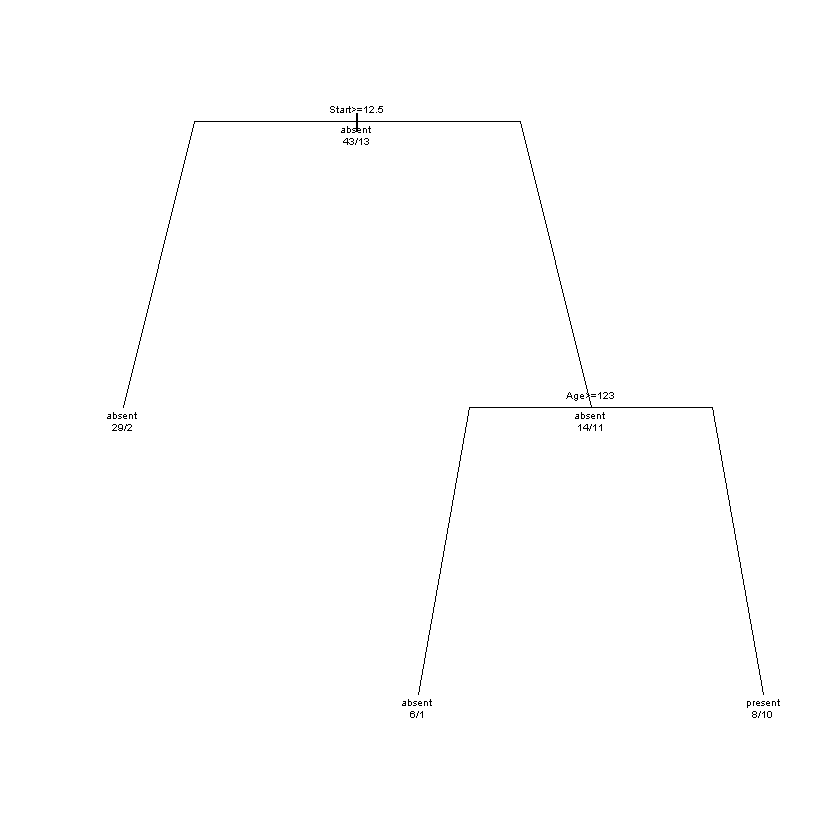

In [10]:
plot(Anp, uniform = T, compress = T, branch = 0.7)
text(Anp, all = T, use.n = T, cex = 0.5)


$Erläuterung$ $Entscheidungsbaum:$

- 1.Knoten: Auf der horizontalen wird der 1. Knoten dargestellt (Start <= 12.5),
Anzahl = 56

- linker Pfad: wenn 'ja' - Anzahl = 32 - Start >= 12.5
2.Knoten: von 31 Eingriffen sind 29 erforderlich und 2 Eingriffe sind sind erforderlich.


- rechter Pfad: wenn 'nein' - Anzahl = 24 - Start <12.5 

- 3.Knoten: 

- linker Pfad: wenn 'ja' Anzahl = 7

- 6.Knoten: Von 7 Eingriffen sind 6 erforderlich und 1 Eingriff ist nicht erforderlich.

- rechter Pfad: 

- 7.Knoten: von 18 Eingriffen sind 8 nicht erforderlich

Es wird verdeutlicht, dass ein operativer Erfolg vom Start-Wirbel und von dem Alter des Kindes abhängt.
Wenn der der geschätzte Baum zu komplex erscheint, so lässt er sich über die Funktion $prune$ zurückschneiden und dann neu schätzen.


In [25]:
# Angaben über Güte der Schätzung
printcp(Anpassung)
summary(Anpassung)


Classification tree:
rpart(formula = Kyphosis ~ Age + Number + Start, data = Training)

Variables actually used in tree construction:
[1] Start

Root node error: 12/56 = 0.21429

n= 56 

       CP nsplit rel error xerror    xstd
1 0.16667      0   1.00000 1.0000 0.25588
2 0.01000      1   0.83333 1.1667 0.27003
Call:
rpart(formula = Kyphosis ~ Age + Number + Start, data = Training)
  n= 56 

         CP nsplit rel error   xerror      xstd
1 0.1666667      0 1.0000000 1.000000 0.2558832
2 0.0100000      1 0.8333333 1.166667 0.2700309

Variable importance
 Start Number 
    92      8 

Node number 1: 56 observations,    complexity param=0.1666667
  predicted class=absent   expected loss=0.2142857  P(node) =1
    class counts:    44    12
   probabilities: 0.786 0.214 
  left son=2 (44 obs) right son=3 (12 obs)
  Primary splits:
      Start  < 8.5  to the right, improve=4.160173, (0 missing)
      Age    < 39.5 to the left,  improve=2.057143, (0 missing)
      Number < 5.5  to the left, 

In [39]:
Vorherge = predict(Anpassung, newdata=Test, type='class')
#Vorhersagen für die Daten 'Test'

In [40]:
#Überblick über Test- und Vorhersage-Daten -> werden beiden Daten zu einen data.frame zusammengefasst
Kombin <- data.frame(Test,Vorherge)
Kombin


,Kyphosis,Age,Number,Start,Vorherge
2,absent,158,3,14,absent
7,absent,61,2,17,absent
8,absent,37,3,16,absent
12,absent,148,3,16,absent
16,absent,1,3,16,absent
17,absent,78,6,15,absent
19,absent,80,5,16,absent
23,present,96,3,12,absent
28,absent,100,3,14,absent
34,absent,112,3,16,absent


[Hier](https://cran.r-project.org/web/packages/rpart/rpart.pdf) findet man weitere Funktionen von rpart.

Gibt man $rpart$ ein und betätigt anschließend die $F1$-Taste, so erhält man folgenden Code und Entscheidungsbaum.

In [51]:
?rpart

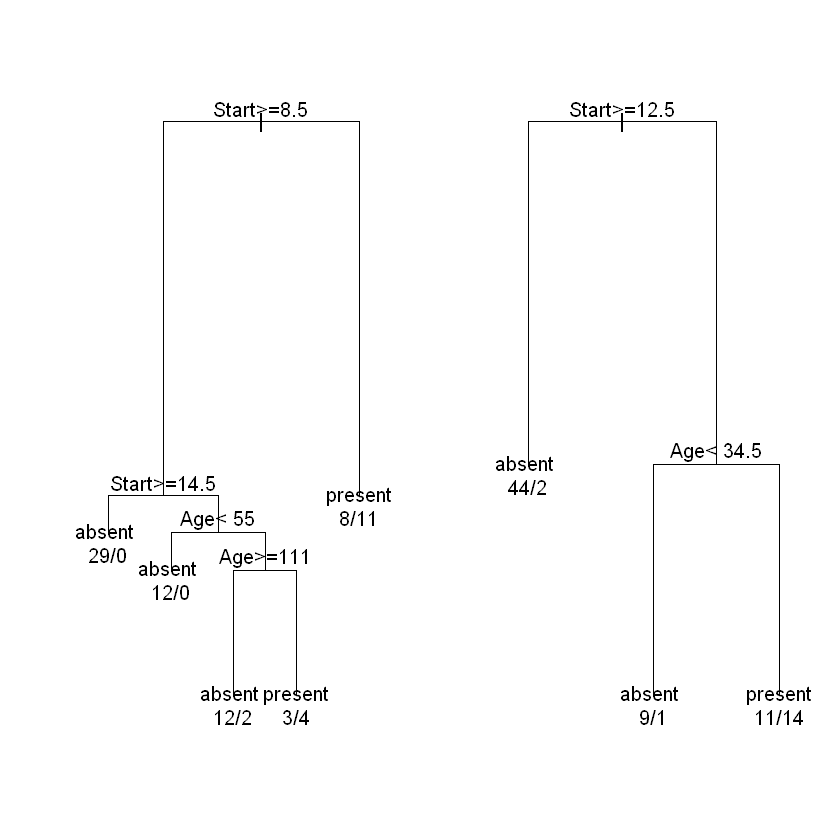

In [30]:
fit <- rpart(Kyphosis ~ Age + Number + Start, data = kyphosis)
fit2 <- rpart(Kyphosis ~ Age + Number + Start, data = kyphosis,
              parms = list(prior = c(.65,.35), split = "information"))
fit3 <- rpart(Kyphosis ~ Age + Number + Start, data = kyphosis,
              control = rpart.control(cp = 0.05))
par(mfrow = c(1,2), xpd = NA) # otherwise on some devices the text is clipped
plot(fit)
text(fit, use.n = TRUE)
plot(fit2)
text(fit2, use.n = TRUE)